### Importing required libraries

In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#load datasets
train = pd.read_csv('train.csv',parse_dates=True, index_col='Date')
test = pd.read_csv('test.csv', parse_dates=True, index_col='Date')
store = pd.read_csv('store.csv')

In [4]:
#explore datasets
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [5]:
test.head()

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,
2015-09-17,1,1,4,1.0,1,0,0
2015-09-17,2,3,4,1.0,1,0,0
2015-09-17,3,7,4,1.0,1,0,0
2015-09-17,4,8,4,1.0,1,0,0
2015-09-17,5,9,4,1.0,1,0,0


In [34]:
train['Year'] = train.index.year
train['Month'] = train.index.month
train['WeekOfYear'] = train.index.weekofyear
    

#### Checking seasonality


In [12]:
time_series = train[['Sales']]

time_series.head()

,Sales
Date,
2015-07-31,5263
2015-07-31,6064
2015-07-31,8314
2015-07-31,13995
2015-07-31,4822


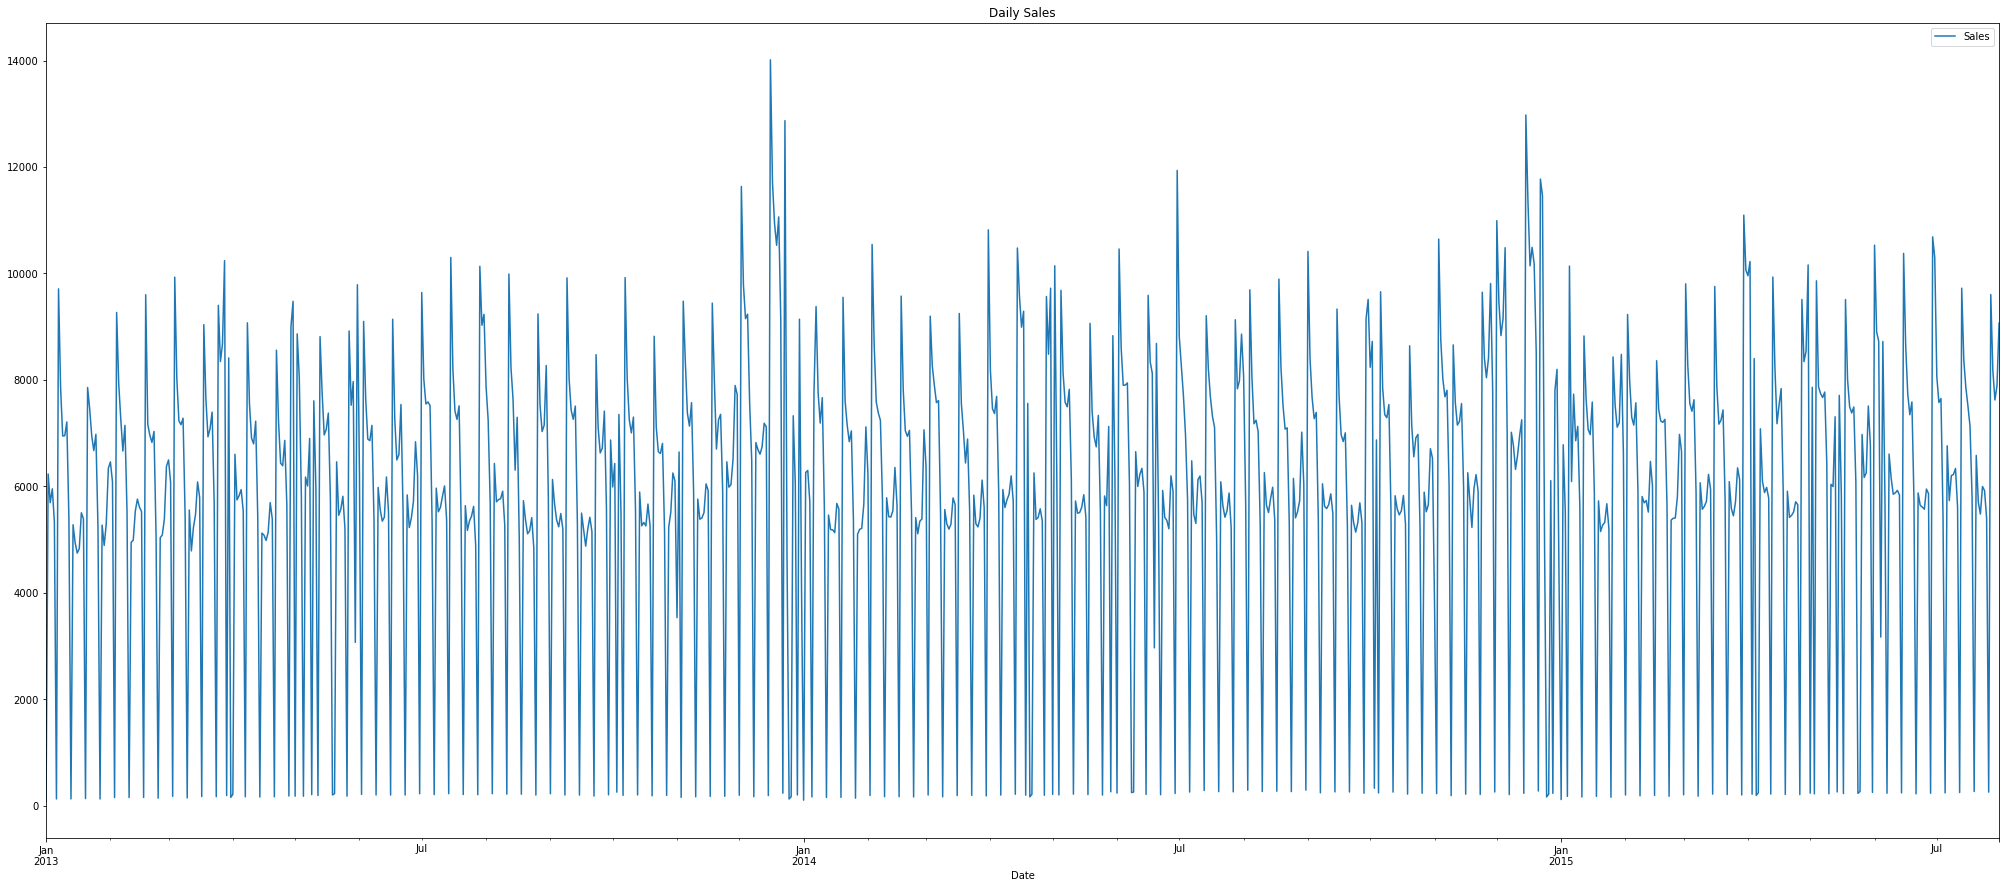

In [13]:
time_series_day = time_series.resample('D').mean()
time_series_day.plot(figsize=(35,15))
plt.savefig('day.png', dpi=300)
plt.title('Daily Sales')
plt.show()

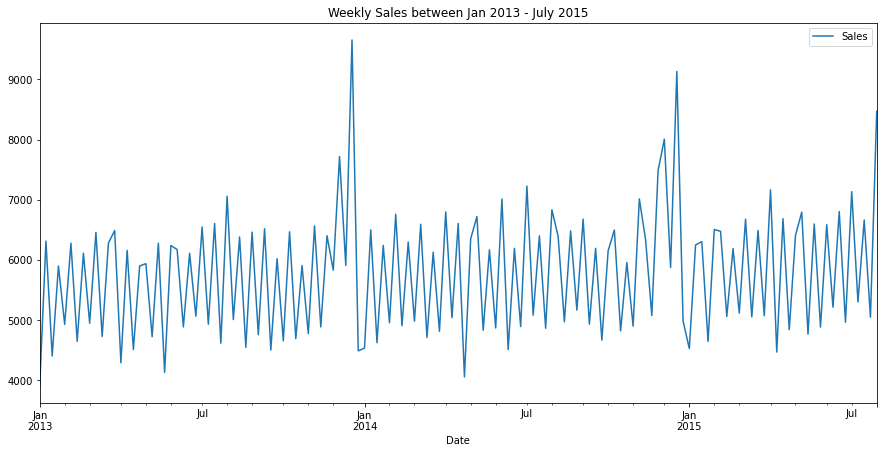

In [16]:
time_series_week = time_series.resample('W').mean()
time_series_week.plot(figsize=(15,7))
plt.title('Weekly Sales between Jan 2013 - July 2015')
plt.show()

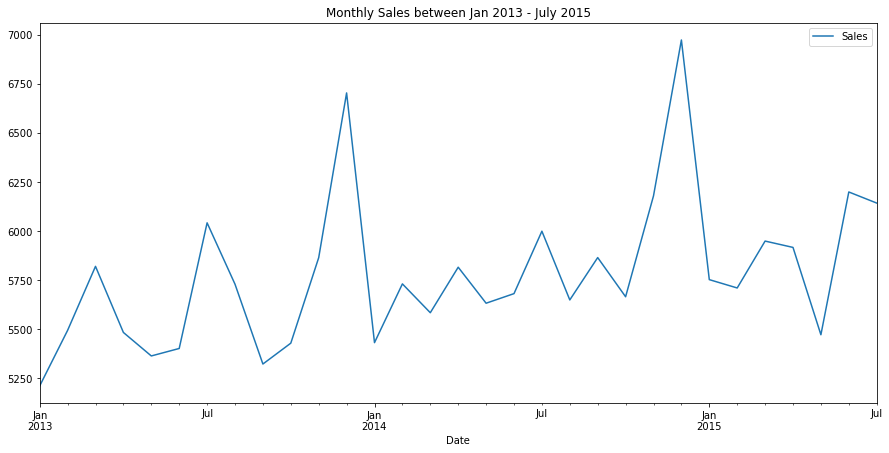

In [17]:
time_series_month = time_series.resample('M').mean()
time_series_month.plot(figsize=(15,7))
plt.title('Monthly Sales between Jan 2013 - July 2015')
plt.savefig('year.png', dpi=300)

plt.show()

In [ ]:
#Peak peroids of sales are around the month of December. 

#### Sales behavior during, before and after holidays

In [20]:
## Dealing with cardinality
train['StateHoliday'].replace({0:'o','0':'o'},inplace=True)
test['StateHoliday'].replace({'0':'o'},inplace=True)

In [22]:
train['StateHoliday'].value_counts()

o    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [23]:
train['SchoolHoliday'].value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

In [24]:
no_holidays = train[train['StateHoliday'] == 'o']
christmas = train[train['StateHoliday'] == 'c']
easter = train[train['StateHoliday'] == 'b']

#### Correlation between sales and number of customers

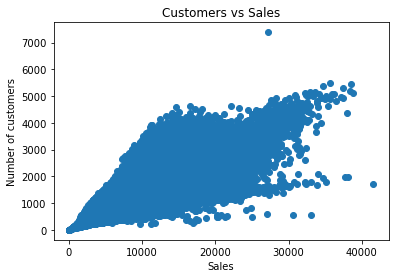

In [25]:
plt.scatter(train['Sales'], train['Customers'])
plt.xlabel('Sales')
plt.ylabel("Number of customers")
plt.title('Customers vs Sales')
plt.savefig('sale.png', dpi=300)
plt.show()

In [27]:
# adding new variable Salespercustomer
train['SalePerCustomer'] = train['Sales']/train['Customers']
train['SalePerCustomer'].describe()

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64

In [28]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [29]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [30]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)

In [35]:
train_store = pd.merge(train, store, how = 'inner', on = 'Store')

In [36]:
train_store.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalePerCustomer,Year,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,o,1,9.482883,2015,...,31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,5020,546,1,1,o,1,9.194139,2015,...,31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,4782,523,1,1,o,1,9.143403,2015,...,31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,5011,560,1,1,o,1,8.948214,2015,...,31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,6102,612,1,1,o,1,9.970588,2015,...,31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


#### Store type analysis

In [38]:
# get the statistics of each Store Type
train_store.groupby('StoreType').Sales.describe()


,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,551627.0,5738.179710,3964.028134,0.0,3508.0,5618.0,7860.00,41551.0
b,15830.0,10058.837334,5280.525506,0.0,6227.0,9025.5,13082.75,38722.0
c,136840.0,5723.629246,3721.700886,0.0,3789.0,5766.0,7849.00,31448.0
d,312912.0,5641.819243,3473.393781,0.0,3986.0,5826.0,7691.00,38037.0


In [39]:
train_store.groupby('StoreType')['Customers', 'Sales'].sum()
#Store type a has the most customers and sales in total

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Customers,Sales
StoreType,,
a,363541434,3165334859
b,31465621,159231395
c,92129705,783221426
d,156904995,1765392943


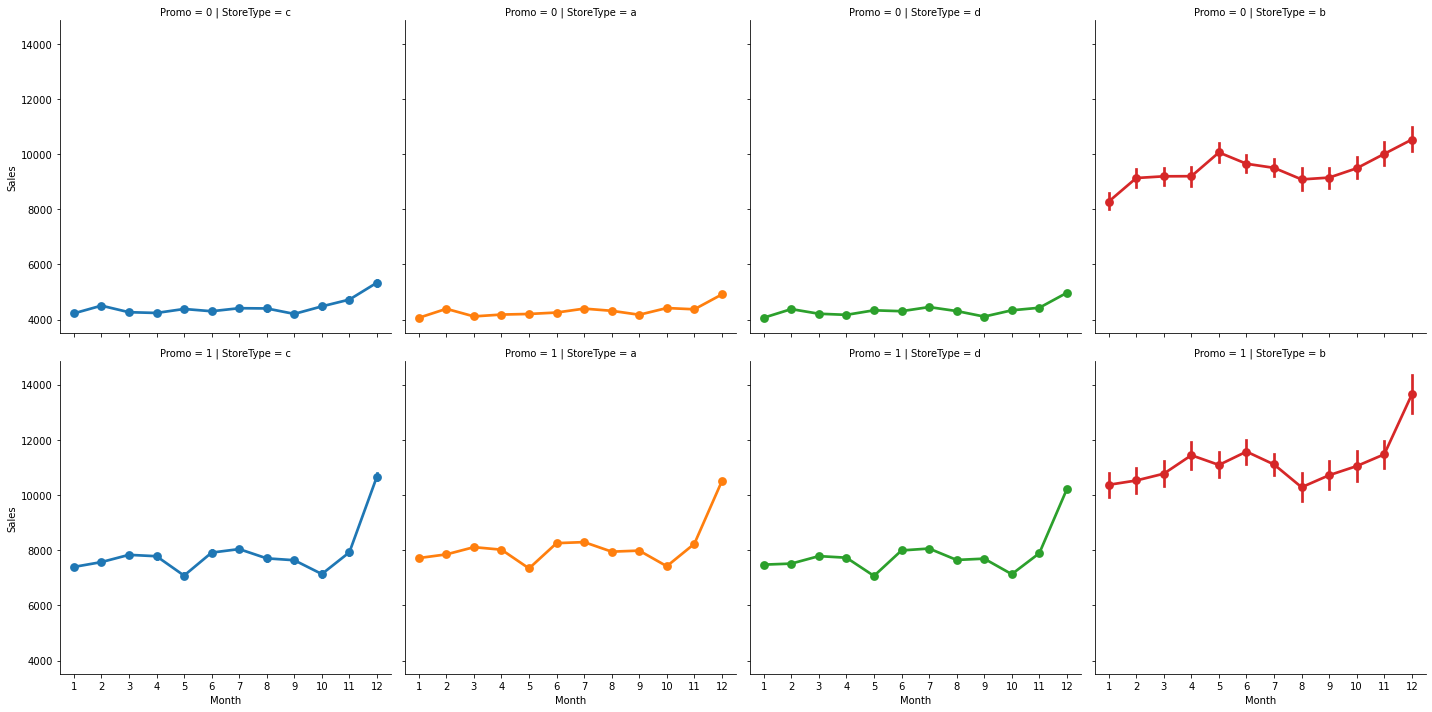

In [37]:
# ploting the Monthly Sales for each store type when with a promo and without one
sns.catplot(x='Month', y='Sales', data=train_store, kind='point',
            col='StoreType', row='Promo', hue='StoreType')

- There is generally an increase in sales across all store types when there is a promo, with Store Type b having the most Sales through out the year during promos.
- There is an increase in sales around christmas period December

#### Check how assortment type affects sales

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


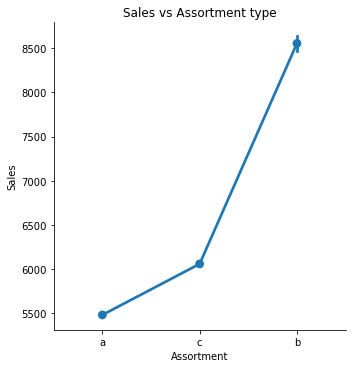

In [43]:
sns.factorplot(data=train_store, x='Assortment', y='Sales')
plt.title('Sales vs Assortment type')
plt.savefig('assortment.png', dpi=300, bbox_inches='tight')
plt.show()
#the extra assortment type gets more sales. 

#### Promos and sales

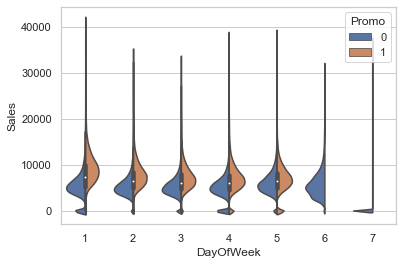

In [40]:
sns.set(style="whitegrid")
sns.violinplot(x="DayOfWeek",y="Sales",hue="Promo",split=True, data=train_store)

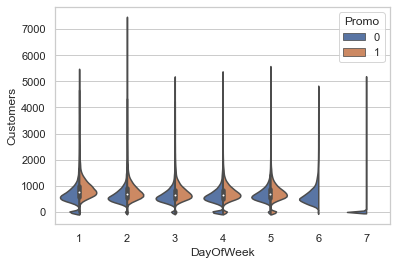

In [41]:
sns.set(style="whitegrid")
sns.violinplot(x="DayOfWeek",y="Customers",hue="Promo",split=True, data=train_store)

The days promos were present have indeed shown a slight improvement in Sales. The plot above also shows that there was no promo offered on 6th and the 7th day of the week (Saturday and Sunday), and stores didn't suffer for doing so either, as it can be seen the no. of customers on the weekends, were more that that during the weekdays.



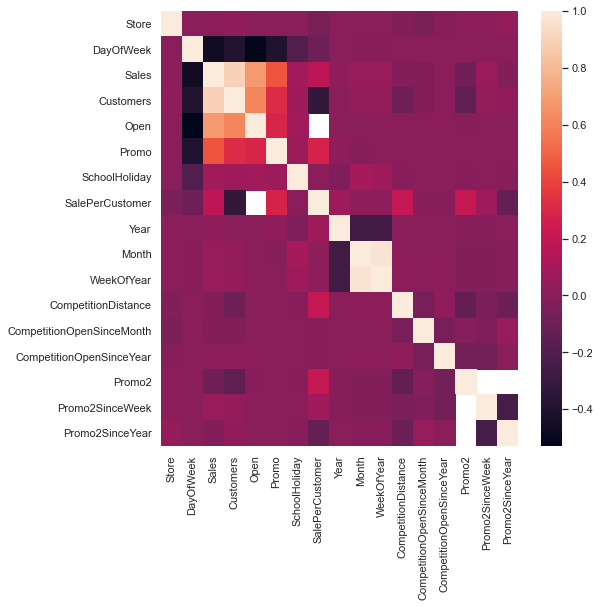

In [46]:
#Correlation between data columns
plt.figure(figsize=(8,8))
sns.heatmap((train_store.corr()))

the heatmap shows there is very little correlation between School Holiday, Customers and Promo, but there is a strong correlation between Promo and Sales